<a href="https://colab.research.google.com/github/alfredamboka/DeepTech5Yr/blob/main/CropTypeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Machine Learning Algorithms based Crop Type Mapping in North-Western part of Bangladesh using Google Earth Engine (GEE) and Python
## Group-3 Members:
1. Shakhawat Hossain, Research Assistant, ASICT Division, BARI.
2. Suman Biswas, Scientific Officer, ASICT Division, BARI.
3. Dr. Md. Golam Mahboob, Principal Scientific Officer, Forestry Unit, BARC.

## Introduction

### Background
 Precise crop type maps are crucial for monitoring cropping patterns, sustainable use of available natural resources and estimating harvests. Manual digitization and labeling—the usual method of creating crop type maps— is mostly time consuming, expensive and even prone to human errors. The Machine learning algorithms have been evolved as cost-effective alternatives for classifying crop varieties using satellite imageries in recent times. Coping with the recent advances, the machine learning algorithms will be deployed in this study to classify 6 crop types of north-western part (Godagari Upazila of Rajshahi district) in Bangladesh from Sentinel-2 imagery. Four machine learning algorithms (Random Forest, Artificial Neural Network, KNN and Support Vector Machine) will be investigated for mapping the crop types accurately.

### Objectives
1. To asses schematic approach for crop type classification
2. To identify an optimal Machine Learning algorithm for 6 major Crop types in the north-western part of Bangladesh (Godagari Upazila of Rajshahi District).
3. To map crop types using Machine Learning algorithm.

## Methodology

### Dataset
In this study, Sentinel-2 satellite data has been used. 15 images were available from October 2020 to March 2021 with a cloud coverage of less than or equal to five percent covering the study area. The details of the available images are as follows: imegery dates for October (20201016, single image), November (20201105, 20201110, 20201115, 20201125, 20201130, 5 images), December (20201230, single image), January (20210109, single image), February (20210203, 20210208, 20210218, 20210223, 20210228, 5 images), March (20210305, 20210315, 2 images). We also have 577 ground truth points (GTPs) which have been collected by field visits from 22 February to 9 March 2021 which have been used as well. These GTPs include samples for all 7 crop types (Rice-175, Wheat-45, Potato-44, Maize-86, Mustard-23, Lentil-46, and Others-158) which we wanted to classify in this project.

### Method
In this study, GEE has been used to complete the task along with python API. The median image has been calculated for the study period during Oct-Mar. Median band reflectivity and vegetation indices (NDVI & EVI) for the total composite has been assessed here as well.
Four experimental schemes:
1. VIS bands;
2. VIS bands + NIR;
3. VIS bands + VI Indices;
4. VIS bands + NIR + VI Indices
<br> have been tested using RF, ANN (MPL), SVM , XGBoosting and KNN machine learning algorithms. Finally, the model results have been evaluated using Accuracy Assessment and F-score indices. The best algorithm then has been used to classify final crop type map of the study area.

In [ ]:
# from IPython.display import Image
# print('Figure 1: Methodology Flowchart')
# Image(filename = "/data/private/Phase 3/Project/Method.JPG", height=600, width=600)

### Data Pre-processing

#### Sentinel-2 Data Preprocessing:
All the available 15 Sentinel-2 images have been used to derive a single band Median image for the six months during the study period (Oct. 2020-Mar. 2021). Here Sentinel-2 images have been processed using Google Earth Engine API, ee and geemap libraries. Using the Study area shapefile the respective median image has been derived, used and analyzed for further processing.

##### Installation of geemap
geemap is a Python package for interactive mapping with Google Earth Engine, ipyleaflet, and ipywidgets, which is a cloud computing platform with a multi-petabyte catalog of satellite imagery and geospatial datasets. geemap is intended for students and researchers, who would like to utilize the Python ecosystem of diverse libraries and tools to explore Google Earth Engine. It is also designed for existing GEE users who would like to transition from the GEE JavaScript API to Python API. The automated JavaScript-to-Python conversion module of the geemap package can greatly reduce the time needed to convert existing GEE JavaScripts to Python scripts and Jupyter notebooks.

For more details: https://geemap.org/

In [ ]:
import ee
# ee.Authenticate()
# ee.Initialize()

##### Initialize the Earth Engine library

In [ ]:
# try:
#   ee.Initialize()
#   print('Google Earth Engine has initialized successfully!')
# except ee.EEException as e:
#   print('Google Earth Engine has failed to initialize!')
# except:
#     print("Unexpected error:", sys.exc_info()[0])
#     raise

##### Creating an interactive map

In [ ]:
try:
    import geemap
except ModuleNotFoundError:
    if 'google.colab' in str(get_ipython()):
        print('geemap not found, installing via pip in Google Colab...')
        !pip install geemap --quiet
        import geemap
    else:
        print('geemap not found, please install via conda in your environment')

In [ ]:
Map = geemap.Map(center=(24.478, 88.43), zoom=11)
Map

Map(center=[24.478, 88.43], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childr…

##### Add Study area shapefile from your directory

In [ ]:
roi = ee.FeatureCollection("users/shohelovro/CropTypePaper/Godagari_Upazila")
# roi = ee.FeatureCollection("projects/project5yr/assets/BuraStudyArea")
aoi = roi.geometry()       # Convert Feature Collecion to Geometry as String

##### Add Earth Engine data and filter as per need

In [ ]:
# Monthly dataset collection
dataset = ee.ImageCollection("COPERNICUS/S2_SR")\
            .filterDate('2020-10-01', '2021-03-31')\
            .filterBounds(roi)\
            .filter('CLOUDY_PIXEL_PERCENTAGE <= 5')

##### Check the Image List

In [ ]:
listOfImages = dataset.aggregate_array('system:index').getInfo()
print('Number of images in the collection: ', len(listOfImages))

listOfImages

Number of images in the collection:  33


['20201016T043801_20201016T044709_T45RXH',
 '20201105T044001_20201105T044932_T45QXG',
 '20201105T044001_20201105T044932_T45RXH',
 '20201110T044019_20201110T044603_T45QXG',
 '20201110T044019_20201110T044603_T45RXH',
 '20201115T044051_20201115T044045_T45QXG',
 '20201115T044051_20201115T044045_T45RXH',
 '20201125T044121_20201125T044124_T45RXH',
 '20201130T044139_20201130T044138_T45QXG',
 '20201130T044139_20201130T044138_T45RXH',
 '20201215T044211_20201215T044207_T45QXG',
 '20201220T044209_20201220T044209_T45QXG',
 '20201230T044209_20201230T044924_T45QXG',
 '20201230T044209_20201230T044924_T45RXH',
 '20210109T044149_20210109T044908_T45QXG',
 '20210109T044149_20210109T044908_T45RXH',
 '20210203T044011_20210203T045035_T45QXG',
 '20210203T044011_20210203T045035_T45RXH',
 '20210208T043939_20210208T044440_T45QXG',
 '20210208T043939_20210208T044440_T45RXH',
 '20210218T043829_20210218T044429_T45QXG',
 '20210218T043829_20210218T044429_T45RXH',
 '20210223T043801_20210223T044723_T45QXG',
 '20210223T

##### Set visualization parameters

In [ ]:
rgb_vis = {'min':0, 'max':3000, 'bands':['B4','B3','B2']}
ndvi_colorizedVis = {"min":0,"max":1,"palette":["FFFFFF","CE7E45","DF923D", \
                    "F1B555","FCD163","99B718","74A901","66A000","529400","3E8601",\
                    "207401","056201","004C00","023B01","012E01","011D01","011301"]}

### Oct-Mar Median Image Calculation

In [ ]:
oct_mar_med = dataset.median().select('B2','B3','B4','B8','B5','B6','B7','B8A','B11','B12').clip(roi)

##### Visualizing median image (optional)

### Reflectance Band Calculation
Convert band values to reflectance values

In [ ]:
oct_mar_ref = oct_mar_med.divide(10000)

### Indices Calculation

##### NDVI Calculation

In [ ]:
oct_mar_ndvi = oct_mar_med.normalizedDifference(['B8', 'B4']).rename('ndvi').toDouble()

##### EVI Calculation

In [ ]:
oct_mar_evi = oct_mar_med.expression('2.5*((NIR-R)/(NIR+6*R+1-7.5*B))',{
                                        'NIR':oct_mar_med.select('B8'),
                                        'R':oct_mar_med.select('B4'),
                                        'B':oct_mar_med.select('B2')}) \
                                        .rename('evi')

### Final Composite Layer Derivation

In [ ]:
oct_mar_comp = oct_mar_ref.addBands(oct_mar_ndvi).addBands(oct_mar_evi)

##### Output Investigation

In [ ]:
# Get information about the bands as a list.
bandNames = oct_mar_comp.bandNames()
print('Band Names: ', bandNames.getInfo()) # ee.List of band names

Band Names:  ['B2', 'B3', 'B4', 'B8', 'B5', 'B6', 'B7', 'B8A', 'B11', 'B12', 'ndvi', 'evi']


In [ ]:
# Get projection information from band 1.
b2proj = oct_mar_comp.select('B2').projection()
print('Band 2 projection: ', b2proj.getInfo()) # ee.Projection object

Band 2 projection:  {'type': 'Projection', 'crs': 'EPSG:4326', 'transform': [1, 0, 0, 0, 1, 0]}


# Reference Data Processing and Analysis
Reference data have been processed here in two different ways.
Firstly, we have prepared our data outside of this environment in ArcGIS so that reference dataset can be utilized in a better way. We have clipped the composite median image using sample polygons generated from point GPS values by manual digitization based on field experiences. The clipped pixels then converted again into sample points for 10 meter scale resolution. Now, the sample points cover 40784 pixels (Rice-10950, Wheat-786, Potato-5967, Maize-2806, Mustard-208, Lentil-482, and Others-19585). Finally the processed sample point shapefile has been exported into .csv file format and analyzed below:   

##### Read the CSV data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import geopandas as gpd
import pandas as pd
# Data can be downloaded here --https://drive.google.com/file/d/1tB9yQfTZm_VdMswqOiArNxUjckdAWNvH/view?usp=sharing
path = r'/content/drive/MyDrive/Colab Notebooks/SamplePtsUpdated.csv'
data = pd.read_csv(path)
data.head()

,FID,pointid,grid_code,Type,Value,B2,B3,B4,B8,B5,B6,B7,B8A,B11,B12,NDVI,EVI
0,0,312,0.08075,Rice,1,0.0666,0.0850,0.0897,0.1554,0.1125,0.1356,0.1504,0.1682,0.1599,0.0896,0.268054,0.845778
1,1,313,0.08070,Rice,1,0.0660,0.0830,0.0915,0.1724,0.1120,0.1379,0.1514,0.1694,0.1616,0.0926,0.306556,0.892936
2,2,314,0.08075,Rice,1,0.0662,0.0852,0.0902,0.1665,0.1120,0.1379,0.1514,0.1694,0.1616,0.0926,0.297234,0.902745
3,3,315,0.08085,Rice,1,0.0672,0.0851,0.0910,0.1681,0.1125,0.1356,0.1504,0.1682,0.1599,0.0896,0.297569,0.916984
4,4,316,0.08145,Rice,1,0.0653,0.0865,0.0926,0.1654,0.1125,0.1356,0.1504,0.1682,0.1599,0.0896,0.282171,0.786687


In [ ]:
# Get Data info (Optional)
print("Shape",data.shape)
print(data.dtypes)

Shape (40784, 17)
FID            int64
pointid        int64
grid_code    float64
Type          object
Value          int64
B2           float64
B3           float64
B4           float64
B8           float64
B5           float64
B6           float64
B7           float64
B8A          float64
B11          float64
B12          float64
NDVI         float64
EVI          float64
dtype: object


In [ ]:
#No. of observation by crop type (Class)
data['Type'].value_counts().sort_values()

Mustard      208
Lentil       482
Wheat        786
Maize       2806
Potato      5967
Rice       10950
Others     19585
Name: Type, dtype: int64

### Crop specific spectral response has been analyzed below:

In [ ]:
# Descriptive statistics of the spectral values and VIs
data1=data.drop(['Value', 'NDVI', 'EVI', 'FID', 'pointid', 'grid_code'], axis=1) # Drop Value column
me_spec=data1.groupby(['Type']).mean()
me_spec_t=me_spec.transpose()
me_spec_t

Type,Lentil,Maize,Mustard,Others,Potato,Rice,Wheat
B2,0.083534,0.077572,0.079573,0.096671,0.078404,0.077699,0.066113
B3,0.111863,0.096939,0.108807,0.125035,0.107411,0.104933,0.088976
B4,0.124080,0.081127,0.107191,0.114570,0.096299,0.100092,0.079622
B8,0.262024,0.260879,0.271557,0.121021,0.312261,0.231420,0.267996
B5,0.165522,0.112621,0.160313,0.126355,0.153658,0.142223,0.123366
B6,0.226557,0.205998,0.231341,0.116221,0.259868,0.202418,0.217591
B7,0.249095,0.253787,0.259280,0.121744,0.300461,0.221817,0.255961
B8A,0.269411,0.266923,0.279192,0.118926,0.327353,0.238328,0.276281
B11,0.254620,0.170973,0.216983,0.125592,0.226354,0.179965,0.185085
B12,0.183351,0.096306,0.141231,0.112544,0.139435,0.103225,0.112439


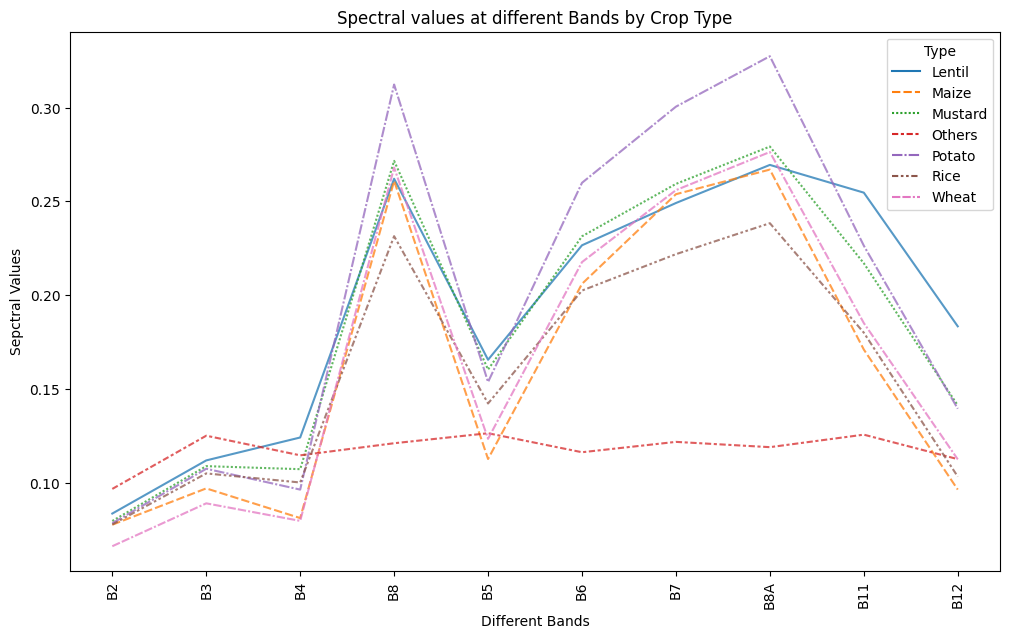

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12,7))
sns.lineplot(data=me_spec_t, alpha=0.75)
plt.title("Spectral values at different Bands by Crop Type")
plt.xlabel("Different Bands")
plt.ylabel("Sepctral Values")
plt.xticks(rotation=90)

# plt.tight_layout()
plt.show()

### Response of different crop types are:

In [ ]:
# Descriptive statistics of the spectral values and VIs
data2=data.drop(['Value', 'B2', 'B3', 'B4', 'B8', 'B5', 'B6', 'B7', 'B8A', 'B11', 'B12', 'FID', 'pointid', 'grid_code'], axis=1) # Drop Value column
me_spec=data2.groupby(['Type']).mean()
me_spec_t=me_spec
me_spec_t

,NDVI,EVI
Type,,
Lentil,0.357680,0.946214
Maize,0.525370,2.906864
Mustard,0.432894,1.350845
Others,-0.101686,0.820563
Potato,0.527948,1.908365
Rice,0.390974,1.400188
Wheat,0.540792,1.952659


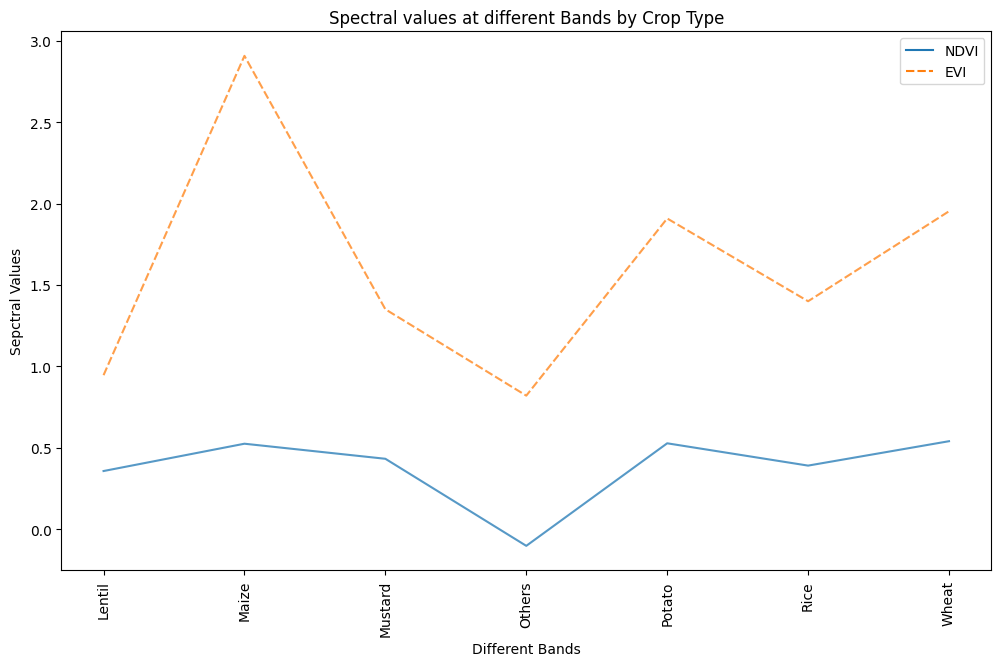

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12,7))
sns.lineplot(data=me_spec_t, alpha=0.75)
plt.title("Spectral values at different Bands by Crop Type")
plt.xlabel("Different Bands")
plt.ylabel("Sepctral Values")
plt.xticks(rotation=90)

# plt.tight_layout()
plt.show()

# Model Development

### Import Necessary Libraries

In [ ]:
# linear algebra
import numpy as np
# data processing
import pandas as pd
# data visualization (Graphs are designed by this library)
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Algorithms
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Accuracy
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn import metrics
from sklearn.metrics import f1_score

### Read Data

In [ ]:
import geopandas as gpd
from shapely.geometry import shape

path = r"/content/drive/MyDrive/Colab Notebooks/RefData.geojson"
data = gpd.read_file(path, driver='GeoJSON')
data.head(3)


# # Read the shapefile from GEE assets as a GeoDataFrame
# ee_object = ee.FeatureCollection("projects/project5yr/assets/RefData")

# # Get the number of features in the shapefile
# num_features = ee_object.size().getInfo()

# # Initialize empty lists for geometries and properties
# geometries_list = []
# properties_list = []

# # Set batch size to limit the number of features per query
# batch_size = 1000

# # Iterate over the features in batches
# for start_idx in range(0, num_features, batch_size):
#     end_idx = start_idx + batch_size

#     # Get the batch of features
#     batch_features = ee_object.toList(batch_size, start_idx)

#     # Extract the geometries and properties from the batch
#     batch_geometries = []
#     batch_properties = []

#     for i in range(batch_features.length().getInfo()):
#         feature = ee.Feature(batch_features.get(i))
#         geometry = feature.geometry()
#         properties = feature.toDictionary()

#         batch_geometries.append(shape(geometry.getInfo()))
#         batch_properties.append(properties)

#     geometries_list.extend(batch_geometries)
#     properties_list.extend(batch_properties)

# # Create a GeoDataFrame from the geometries and properties
# data = gpd.GeoDataFrame(properties_list, geometry=geometries_list)

# data.head()

,pointid,grid_code,Type,Value,B2,B3,B4,B8,B5,B6,B7,B8A,B11,B12,NDVI,EVI,geometry
0,312,0.08075,Rice,1,0.0666,0.0850,0.0897,0.1554,0.1125,0.1356,0.1504,0.1682,0.1599,0.0896,0.268054,0.845778,POINT (88.31001 24.55415)
1,313,0.08070,Rice,1,0.0660,0.0830,0.0915,0.1724,0.1120,0.1379,0.1514,0.1694,0.1616,0.0926,0.306556,0.892936,POINT (88.30974 24.55406)
2,314,0.08075,Rice,1,0.0662,0.0852,0.0902,0.1665,0.1120,0.1379,0.1514,0.1694,0.1616,0.0926,0.297234,0.902745,POINT (88.30983 24.55406)


In [ ]:
df = pd.DataFrame(data)
type(df)
df.columns

Index(['pointid', 'grid_code', 'Type', 'Value', 'B2', 'B3', 'B4', 'B8', 'B5',
       'B6', 'B7', 'B8A', 'B11', 'B12', 'NDVI', 'EVI', 'geometry'],
      dtype='object')

# Scheme 1

## Variable declaration

In [ ]:
df_model = pd.get_dummies(df[['pointid', 'grid_code', 'Type', 'Value', 'B2', 'B3', 'B4', 'B8', 'B5', 'B6', 'B7', 'B8A', 'B11', 'B12', 'NDVI', 'EVI', 'geometry']])
# df_model.tail()
df_model.drop(columns=['pointid', 'grid_code','geometry'],inplace=True)
# df_model.tail()
y = df_model.pop('Value')
df_model = df_model.iloc[:, 0:3] # Scheme_1 (RGB Bands)
# df_model = df_model.iloc[:, 0:4] # Scheme_2 (RGB + NIR Bands)
# df_model = df_model.loc[:, ['B2', 'B3', 'B4', 'NDVI', 'EVI']] # Scheme_3 (RGB + Indices)
# df_model = df_model.loc[:, ['B2', 'B3', 'B4', 'B8','NDVI', 'EVI']] # Scheme_4 (RGB + NIR Bands + Indices)
X = df_model
X.columns

Index(['B2', 'B3', 'B4'], dtype='object')

## Test-Train Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

scaler = StandardScaler() #scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((28548, 3), (12236, 3), (28548,), (12236,))

# RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50) # Try with different number of estimators
rf = rf.fit(X_train, y_train.values.ravel())

# Prediction Using Random Forest Classifier
from sklearn.metrics import accuracy_score, confusion_matrix

Y_pred_rf = rf.predict(X_test)

Class_Acc_RF1 = accuracy_score(y_test, Y_pred_rf)*100
print(Class_Acc_RF1)
# print("Classification accuracy of RF is", Class_Acc_RF)
print(classification_report(y_test, Y_pred_rf))

82.31448185681596
              precision    recall  f1-score   support

           1       0.73      0.81      0.77      3335
           2       0.57      0.46      0.51       210
           3       0.61      0.57      0.59      1748
           4       0.79      0.74      0.77       808
           5       0.53      0.13      0.21        62
           6       0.46      0.20      0.28       153
           7       0.96      0.95      0.96      5920

    accuracy                           0.82     12236
   macro avg       0.67      0.55      0.58     12236
weighted avg       0.82      0.82      0.82     12236



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# K-NNC
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

# Predict the labels of test data

knn_pred = knn.predict(X_test)
Class_Acc_KNN1 = accuracy_score(y_test, knn_pred)*100
print(Class_Acc_KNN1)

print(classification_report(y_test, knn_pred))

80.09970578620465
              precision    recall  f1-score   support

           1       0.69      0.82      0.75      3335
           2       0.49      0.46      0.47       210
           3       0.56      0.47      0.51      1748
           4       0.76      0.70      0.73       808
           5       0.00      0.00      0.00        62
           6       0.38      0.16      0.23       153
           7       0.96      0.94      0.95      5920

    accuracy                           0.80     12236
   macro avg       0.55      0.51      0.52     12236
weighted avg       0.80      0.80      0.80     12236



# ANN (MLP)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Train the Model
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation = 'relu', solver='adam', alpha=1e-5, hidden_layer_sizes=(15), max_iter=5000)
#Hidden ayer Sizes, iterations and other parameters can be tuned for better results furthermore.
mlp.fit(X_train, y_train.values.ravel())

# Prediction Using MLP (ANN) Classifier
Y_pred_mlp = mlp.predict(X_test)

Class_Acc_MLP1 = accuracy_score(y_test, Y_pred_mlp)*100
print(Class_Acc_MLP1)
print(classification_report(y_test, Y_pred_mlp))

78.78391631252043
              precision    recall  f1-score   support

           1       0.67      0.83      0.74      3335
           2       0.42      0.25      0.31       210
           3       0.58      0.39      0.47      1748
           4       0.69      0.71      0.70       808
           5       0.00      0.00      0.00        62
           6       0.00      0.00      0.00       153
           7       0.93      0.94      0.94      5920

    accuracy                           0.79     12236
   macro avg       0.47      0.45      0.45     12236
weighted avg       0.77      0.79      0.77     12236



# SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(degree=7, random_state=42)

# Fit Data
svm.fit(X_train, y_train)

# Predict labels for test data
svm_pred = svm.predict(X_test)
Class_Acc_SVM1 = accuracy_score(y_test, svm_pred)*100
print(Class_Acc_SVM1)
# Accuracy and Classification Reeport
# print(f"Accuracy: {accuracy_score(y_test, svm_pred)*100}")
print(classification_report(y_test, svm_pred))

78.47335730630925
              precision    recall  f1-score   support

           1       0.65      0.87      0.74      3335
           2       0.42      0.28      0.33       210
           3       0.60      0.30      0.41      1748
           4       0.76      0.67      0.71       808
           5       0.00      0.00      0.00        62
           6       0.00      0.00      0.00       153
           7       0.93      0.94      0.93      5920

    accuracy                           0.78     12236
   macro avg       0.48      0.44      0.45     12236
weighted avg       0.77      0.78      0.76     12236



# XGBoosting

In [ ]:
import numpy as np

y_train = np.array(y_train) - 1 #Added

from xgboost import XGBClassifier
import xgboost as xgb
xgb_model  = XGBClassifier()
xgb_model.fit(X_train, y_train)

xgb_model_pred = xgb_model.predict(X_test)
Class_Acc_XGB1 = accuracy_score(y_test, xgb_model_pred)*100
print(Class_Acc_XGB1)

# print(f"Accuracy: {accuracy_score(y_test, xgb_model_pred)*100}")

print(classification_report(y_test, xgb_model_pred))

0.7110166721150702
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.16      0.01      0.02      3335
           2       0.00      0.02      0.00       210
           3       0.04      0.02      0.02      1748
           4       0.00      0.00      0.00       808
           5       0.02      0.02      0.02        62
           6       0.00      0.15      0.01       153
           7       0.00      0.00      0.00      5920

    accuracy                           0.01     12236
   macro avg       0.03      0.03      0.01     12236
weighted avg       0.05      0.01      0.01     12236



In [ ]:
performance_matrix_list = {'Models':['RF1','KNN1','ANN (MLP)1','SVM1', 'XGradientBoosting1'],
                           'Accuracy':[Class_Acc_RF1, Class_Acc_KNN1, Class_Acc_MLP1, Class_Acc_SVM1, Class_Acc_XGB1]}

performance_df = pd.DataFrame(performance_matrix_list)
performance_df = performance_df.sort_values(by='Accuracy', ascending=False)
performance_df

,Models,Accuracy
0,RF1,82.314482
1,KNN1,80.099706
2,ANN (MLP)1,78.783916
3,SVM1,78.473357
4,XGradientBoosting1,0.711017


# Scheme 2

# Variable declaration

In [ ]:
df_model = pd.get_dummies(df[['pointid', 'grid_code', 'Type', 'Value', 'B2', 'B3', 'B4', 'B8', 'B5', 'B6', 'B7', 'B8A', 'B11', 'B12', 'NDVI', 'EVI', 'geometry']])
# df_model.tail()
df_model.drop(columns=['pointid', 'grid_code','geometry'],inplace=True)
# df_model.tail()
y = df_model.pop('Value')
# df_model = df_model.iloc[:, 0:3] # Scheme_1 (RGB Bands)
df_model = df_model.iloc[:, 0:4] # Scheme_2 (RGB + NIR Bands)
# df_model = df_model.loc[:, ['B2', 'B3', 'B4', 'NDVI', 'EVI']] # Scheme_3 (RGB + Indices)
# df_model = df_model.loc[:, ['B2', 'B3', 'B4', 'B8','NDVI', 'EVI']] # Scheme_4 (RGB + NIR Bands + Indices)
X = df_model
X.columns

Index(['B2', 'B3', 'B4', 'B8'], dtype='object')

## Test-Train Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

scaler = StandardScaler() #scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((28548, 4), (12236, 4), (28548,), (12236,))

# RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50) # Try with different number of estimators
rf = rf.fit(X_train, y_train.values.ravel())

# Prediction Using Random Forest Classifier
from sklearn.metrics import accuracy_score, confusion_matrix

Y_pred_rf = rf.predict(X_test)

Class_Acc_RF2 = accuracy_score(y_test, Y_pred_rf)*100
print(Class_Acc_RF2)
# print("Classification accuracy of RF is", Class_Acc_RF)
print(classification_report(y_test, Y_pred_rf))

93.49460608041844
              precision    recall  f1-score   support

           1       0.89      0.93      0.91      3335
           2       0.73      0.67      0.69       210
           3       0.91      0.94      0.93      1748
           4       0.86      0.85      0.86       808
           5       0.82      0.15      0.25        62
           6       0.64      0.32      0.43       153
           7       0.99      0.98      0.98      5920

    accuracy                           0.93     12236
   macro avg       0.83      0.69      0.72     12236
weighted avg       0.93      0.93      0.93     12236



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# K-NNC
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

# Predict the labels of test data

knn_pred = knn.predict(X_test)
Class_Acc_KNN2 = accuracy_score(y_test, knn_pred)*100
print(Class_Acc_KNN2)

print(classification_report(y_test, knn_pred))

92.99607714939523
              precision    recall  f1-score   support

           1       0.88      0.93      0.90      3335
           2       0.70      0.70      0.70       210
           3       0.91      0.92      0.91      1748
           4       0.86      0.82      0.84       808
           5       0.00      0.00      0.00        62
           6       0.65      0.35      0.46       153
           7       0.99      0.98      0.98      5920

    accuracy                           0.93     12236
   macro avg       0.71      0.67      0.69     12236
weighted avg       0.93      0.93      0.93     12236



# ANN (MLP)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Train the Model
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation = 'relu', solver='adam', alpha=1e-5, hidden_layer_sizes=(15), max_iter=5000)
#Hidden ayer Sizes, iterations and other parameters can be tuned for better results furthermore.
mlp.fit(X_train, y_train)

# Prediction Using MLP (ANN) Classifier
Y_pred_mlp = mlp.predict(X_test)

Class_Acc_MLP2 = accuracy_score(y_test, Y_pred_mlp)*100
print(Class_Acc_MLP2)
print(classification_report(y_test, Y_pred_mlp))

91.41059169663288
              precision    recall  f1-score   support

           1       0.86      0.91      0.88      3335
           2       0.58      0.64      0.61       210
           3       0.89      0.92      0.90      1748
           4       0.81      0.82      0.81       808
           5       0.00      0.00      0.00        62
           6       0.53      0.12      0.20       153
           7       0.98      0.97      0.98      5920

    accuracy                           0.91     12236
   macro avg       0.67      0.63      0.63     12236
weighted avg       0.91      0.91      0.91     12236



# SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(degree=7, random_state=42)

# Fit Data
svm.fit(X_train, y_train)

# Predict labels for test data
svm_pred = svm.predict(X_test)
Class_Acc_SVM2 = accuracy_score(y_test, svm_pred)*100
print(Class_Acc_SVM2)
# Accuracy and Classification Reeport
# print(f"Accuracy: {accuracy_score(y_test, svm_pred)*100}")
print(classification_report(y_test, svm_pred))

90.83850931677019
              precision    recall  f1-score   support

           1       0.85      0.91      0.88      3335
           2       0.59      0.58      0.58       210
           3       0.88      0.91      0.90      1748
           4       0.78      0.78      0.78       808
           5       0.00      0.00      0.00        62
           6       0.00      0.00      0.00       153
           7       0.98      0.97      0.98      5920

    accuracy                           0.91     12236
   macro avg       0.58      0.59      0.59     12236
weighted avg       0.89      0.91      0.90     12236



# XGBoosting

In [ ]:
import numpy as np

y_train = np.array(y_train) - 1 #added

from xgboost import XGBClassifier
import xgboost as xgb
xgb_model  = XGBClassifier()
xgb_model.fit(X_train, y_train)

xgb_model_pred = xgb_model.predict(X_test)
Class_Acc_XGB2 = accuracy_score(y_test, xgb_model_pred)*100
print(Class_Acc_XGB2)

# print(f"Accuracy: {accuracy_score(y_test, xgb_model_pred)*100}")

print(classification_report(y_test, xgb_model_pred))

0.2778685845047401
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.07      0.00      0.01      3335
           2       0.00      0.02      0.00       210
           3       0.00      0.00      0.00      1748
           4       0.00      0.00      0.00       808
           5       0.00      0.00      0.00        62
           6       0.00      0.08      0.00       153
           7       0.00      0.00      0.00      5920

    accuracy                           0.00     12236
   macro avg       0.01      0.01      0.00     12236
weighted avg       0.02      0.00      0.00     12236



In [ ]:
performance_matrix_list = {'Models':['RF2','KNN2','ANN (MLP)2','SVM2', 'XGradientBoosting2'],
                           'Accuracy':[Class_Acc_RF2, Class_Acc_KNN2, Class_Acc_MLP2, Class_Acc_SVM2, Class_Acc_XGB2]}

performance_df = pd.DataFrame(performance_matrix_list)
performance_df = performance_df.sort_values(by='Accuracy', ascending=False)
performance_df

,Models,Accuracy
0,RF2,93.494606
1,KNN2,92.996077
2,ANN (MLP)2,91.410592
3,SVM2,90.838509
4,XGradientBoosting2,0.277869


# Scheme 3

# Variable Declaration

In [ ]:
df_model = pd.get_dummies(df[['pointid', 'grid_code', 'Type', 'Value', 'B2', 'B3', 'B4', 'B8', 'B5', 'B6', 'B7', 'B8A', 'B11', 'B12', 'NDVI', 'EVI', 'geometry']])
# df_model.tail()
df_model.drop(columns=['pointid', 'grid_code','geometry'],inplace=True)
# df_model.tail()
y = df_model.pop('Value')
# df_model = df_model.iloc[:, 0:3] # Scheme_1 (RGB Bands)
# df_model = df_model.iloc[:, 0:4] # Scheme_2 (RGB + NIR Bands)
df_model = df_model.loc[:, ['B2', 'B3', 'B4', 'NDVI', 'EVI']] # Scheme_3 (RGB + Indices)
# df_model = df_model.loc[:, ['B2', 'B3', 'B4', 'B8','NDVI', 'EVI']] # Scheme_4 (RGB + NIR Bands + Indices)
X = df_model
X.columns

Index(['B2', 'B3', 'B4', 'NDVI', 'EVI'], dtype='object')

# Test-Train Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

scaler = StandardScaler() #scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((28548, 5), (12236, 5), (28548,), (12236,))

# RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50) # Try with different number of estimators
rf = rf.fit(X_train, y_train.values.ravel())

# Prediction Using Random Forest Classifier
from sklearn.metrics import accuracy_score, confusion_matrix

Y_pred_rf = rf.predict(X_test)

Class_Acc_RF3 = accuracy_score(y_test, Y_pred_rf)*100
print(Class_Acc_RF3)
# print("Classification accuracy of RF is", Class_Acc_RF)
print(classification_report(y_test, Y_pred_rf))

93.12683883622098
              precision    recall  f1-score   support

           1       0.88      0.93      0.90      3335
           2       0.72      0.69      0.70       210
           3       0.91      0.93      0.92      1748
           4       0.86      0.85      0.85       808
           5       0.90      0.15      0.25        62
           6       0.72      0.34      0.46       153
           7       0.99      0.98      0.98      5920

    accuracy                           0.93     12236
   macro avg       0.85      0.69      0.72     12236
weighted avg       0.93      0.93      0.93     12236



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# K-NNC
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

# Predict the labels of test data

knn_pred = knn.predict(X_test)
Class_Acc_KNN3 = accuracy_score(y_test, knn_pred)*100
print(Class_Acc_KNN3)

print(classification_report(y_test, knn_pred))

92.45668519123896
              precision    recall  f1-score   support

           1       0.87      0.93      0.90      3335
           2       0.64      0.68      0.66       210
           3       0.91      0.92      0.91      1748
           4       0.83      0.80      0.82       808
           5       0.00      0.00      0.00        62
           6       0.60      0.34      0.44       153
           7       0.99      0.97      0.98      5920

    accuracy                           0.92     12236
   macro avg       0.69      0.66      0.67     12236
weighted avg       0.92      0.92      0.92     12236



# ANN (MLP)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Train the Model
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation = 'relu', solver='adam', alpha=1e-5, hidden_layer_sizes=(15), max_iter=5000)
#Hidden ayer Sizes, iterations and other parameters can be tuned for better results furthermore.
mlp.fit(X_train, y_train)

# Prediction Using MLP (ANN) Classifier
Y_pred_mlp = mlp.predict(X_test)

Class_Acc_MLP3 = accuracy_score(y_test, Y_pred_mlp)*100
print(Class_Acc_MLP3)
print(classification_report(y_test, Y_pred_mlp))

90.80581889506375
              precision    recall  f1-score   support

           1       0.86      0.90      0.88      3335
           2       0.62      0.46      0.53       210
           3       0.88      0.92      0.90      1748
           4       0.76      0.82      0.79       808
           5       0.00      0.00      0.00        62
           6       0.59      0.08      0.15       153
           7       0.98      0.97      0.97      5920

    accuracy                           0.91     12236
   macro avg       0.67      0.59      0.60     12236
weighted avg       0.90      0.91      0.90     12236



# SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(degree=7, random_state=42)

# Fit Data
svm.fit(X_train, y_train)

# Predict labels for test data
svm_pred = svm.predict(X_test)
Class_Acc_SVM3 = accuracy_score(y_test, svm_pred)*100
print(Class_Acc_SVM3)
# Accuracy and Classification Reeport
# print(f"Accuracy: {accuracy_score(y_test, svm_pred)*100}")
print(classification_report(y_test, svm_pred))

90.24190912062767
              precision    recall  f1-score   support

           1       0.84      0.90      0.87      3335
           2       0.60      0.51      0.55       210
           3       0.89      0.91      0.90      1748
           4       0.77      0.76      0.76       808
           5       0.00      0.00      0.00        62
           6       0.00      0.00      0.00       153
           7       0.97      0.97      0.97      5920

    accuracy                           0.90     12236
   macro avg       0.58      0.58      0.58     12236
weighted avg       0.89      0.90      0.89     12236



# XGBoosting

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

import numpy as np

y_train = np.array(y_train) - 1 #added

xgb_model  = XGBClassifier()
xgb_model.fit(X_train, y_train)

xgb_model_pred = xgb_model.predict(X_test)
Class_Acc_XGB3 = accuracy_score(y_test, xgb_model_pred)*100
print(Class_Acc_XGB3)

# print(f"Accuracy: {accuracy_score(y_test, xgb_model_pred)*100}")

print(classification_report(y_test, xgb_model_pred))

0.26969597907813014
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.07      0.00      0.01      3335
           2       0.00      0.02      0.01       210
           3       0.00      0.00      0.00      1748
           4       0.00      0.00      0.00       808
           5       0.00      0.00      0.00        62
           6       0.00      0.07      0.00       153
           7       0.00      0.00      0.00      5920

    accuracy                           0.00     12236
   macro avg       0.01      0.01      0.00     12236
weighted avg       0.02      0.00      0.00     12236



In [ ]:
performance_matrix_list = {'Models':['RF3','KNN3','ANN (MLP)3','SVM3', 'XGradientBoosting3'],
                           'Accuracy':[Class_Acc_RF3, Class_Acc_KNN3, Class_Acc_MLP3, Class_Acc_SVM3, Class_Acc_XGB3]}

performance_df = pd.DataFrame(performance_matrix_list)
performance_df = performance_df.sort_values(by='Accuracy', ascending=False)
performance_df

,Models,Accuracy
0,RF3,93.126839
1,KNN3,92.456685
2,ANN (MLP)3,90.805819
3,SVM3,90.241909
4,XGradientBoosting3,0.269696


# Scheme 4

# Variable Declaration

In [ ]:
df_model = pd.get_dummies(df[['pointid', 'grid_code', 'Type', 'Value', 'B2', 'B3', 'B4', 'B8', 'B5', 'B6', 'B7', 'B8A', 'B11', 'B12', 'NDVI', 'EVI', 'geometry']])
# df_model.tail()
df_model.drop(columns=['pointid', 'grid_code','geometry'],inplace=True)
# df_model.tail()
y = df_model.pop('Value')
# df_model = df_model.iloc[:, 0:3] # Scheme_1 (RGB Bands)
# df_model = df_model.iloc[:, 0:4] # Scheme_2 (RGB + NIR Bands)
# df_model = df_model.loc[:, ['B2', 'B3', 'B4', 'NDVI', 'EVI']] # Scheme_3 (RGB + Indices)
df_model = df_model.loc[:, ['B2', 'B3', 'B4', 'B8','NDVI', 'EVI']] # Scheme_4 (RGB + NIR Bands + Indices)
X = df_model
X.columns

Index(['B2', 'B3', 'B4', 'B8', 'NDVI', 'EVI'], dtype='object')

# Test-Train Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

scaler = StandardScaler() #scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test= scaler.transform(X_test)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((28548, 6), (12236, 6), (28548,), (12236,))

# RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50) # Try with different number of estimators
rf = rf.fit(X_train, y_train.values.ravel())

# Prediction Using Random Forest Classifier
from sklearn.metrics import accuracy_score, confusion_matrix

Y_pred_rf = rf.predict(X_test)

Class_Acc_RF4 = accuracy_score(y_test, Y_pred_rf)*100
print(Class_Acc_RF4)
# print("Classification accuracy of RF is", Class_Acc_RF)
print(classification_report(y_test, Y_pred_rf))

93.32298136645963
              precision    recall  f1-score   support

           1       0.89      0.93      0.91      3335
           2       0.74      0.68      0.71       210
           3       0.91      0.93      0.92      1748
           4       0.85      0.85      0.85       808
           5       0.82      0.15      0.25        62
           6       0.68      0.35      0.47       153
           7       0.99      0.98      0.98      5920

    accuracy                           0.93     12236
   macro avg       0.84      0.69      0.73     12236
weighted avg       0.93      0.93      0.93     12236



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# K-NNC
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

# Predict the labels of test data

knn_pred = knn.predict(X_test)
Class_Acc_KNN4 = accuracy_score(y_test, knn_pred)*100
print(Class_Acc_KNN4)

print(classification_report(y_test, knn_pred))

93.02059496567506
              precision    recall  f1-score   support

           1       0.88      0.93      0.90      3335
           2       0.69      0.69      0.69       210
           3       0.91      0.93      0.92      1748
           4       0.85      0.83      0.84       808
           5       0.00      0.00      0.00        62
           6       0.65      0.33      0.44       153
           7       0.99      0.98      0.98      5920

    accuracy                           0.93     12236
   macro avg       0.71      0.67      0.68     12236
weighted avg       0.93      0.93      0.93     12236



# ANN (MLP)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Train the Model
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation = 'relu', solver='adam', alpha=1e-5, hidden_layer_sizes=(15), max_iter=5000)
#Hidden ayer Sizes, iterations and other parameters can be tuned for better results furthermore.
mlp.fit(X_train, y_train)

# Prediction Using MLP (ANN) Classifier
Y_pred_mlp = mlp.predict(X_test)

Class_Acc_MLP4 = accuracy_score(y_test, Y_pred_mlp)*100
print(Class_Acc_MLP4)
print(classification_report(y_test, Y_pred_mlp))

91.28800261523374
              precision    recall  f1-score   support

           1       0.87      0.90      0.89      3335
           2       0.58      0.60      0.59       210
           3       0.88      0.93      0.90      1748
           4       0.82      0.79      0.80       808
           5       0.00      0.00      0.00        62
           6       0.40      0.10      0.17       153
           7       0.98      0.97      0.97      5920

    accuracy                           0.91     12236
   macro avg       0.65      0.61      0.62     12236
weighted avg       0.90      0.91      0.91     12236



# SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(degree=7, random_state=42)

# Fit Data
svm.fit(X_train, y_train)

# Predict labels for test data
svm_pred = svm.predict(X_test)
Class_Acc_SVM4 = accuracy_score(y_test, svm_pred)*100
print(Class_Acc_SVM4)
# Accuracy and Classification Reeport
# print(f"Accuracy: {accuracy_score(y_test, svm_pred)*100}")
print(classification_report(y_test, svm_pred))

90.47074207257275
              precision    recall  f1-score   support

           1       0.84      0.90      0.87      3335
           2       0.62      0.56      0.58       210
           3       0.88      0.91      0.89      1748
           4       0.78      0.78      0.78       808
           5       0.00      0.00      0.00        62
           6       0.00      0.00      0.00       153
           7       0.98      0.97      0.97      5920

    accuracy                           0.90     12236
   macro avg       0.58      0.59      0.59     12236
weighted avg       0.89      0.90      0.90     12236



# XGBoosting

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
import numpy as np

y_train = np.array(y_train) - 1 #added

xgb_model  = XGBClassifier()
xgb_model.fit(X_train, y_train)

xgb_model_pred = xgb_model.predict(X_test)
Class_Acc_XGB4 = accuracy_score(y_test, xgb_model_pred)*100
print(Class_Acc_XGB4)

# print(f"Accuracy: {accuracy_score(y_test, xgb_model_pred)*100}")

print(classification_report(y_test, xgb_model_pred))

0.2778685845047401
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.07      0.00      0.01      3335
           2       0.00      0.02      0.00       210
           3       0.01      0.00      0.01      1748
           4       0.00      0.00      0.00       808
           5       0.00      0.00      0.00        62
           6       0.00      0.06      0.00       153
           7       0.00      0.00      0.00      5920

    accuracy                           0.00     12236
   macro avg       0.01      0.01      0.00     12236
weighted avg       0.02      0.00      0.00     12236



In [ ]:
performance_matrix_list = {'Models':['RF4','KNN4','ANN (MLP)4','SVM4', 'XGradientBoosting4'],
                           'Accuracy':[Class_Acc_RF4, Class_Acc_KNN4, Class_Acc_MLP4, Class_Acc_SVM4, Class_Acc_XGB4]}

performance_df = pd.DataFrame(performance_matrix_list)
performance_df = performance_df.sort_values(by='Accuracy', ascending=False)
performance_df

,Models,Accuracy
0,RF4,93.322981
1,KNN4,93.020595
2,ANN (MLP)4,91.288003
3,SVM4,90.470742
4,XGradientBoosting4,0.277869


In [ ]:
performance_matrix_list = {'Models':['RF1','KNN1','ANN (MLP)1','SVM1', 'XGradientBoosting1',
                                     'RF2','KNN2','ANN (MLP)2','SVM2', 'XGradientBoosting2',
                                     'RF3','KNN3','ANN (MLP)3','SVM3', 'XGradientBoosting3',
                                     'RF4','KNN4','ANN (MLP)4','SVM4', 'XGradientBoosting4'],
                           'Accuracy':[Class_Acc_RF1, Class_Acc_KNN1, Class_Acc_MLP1, Class_Acc_SVM1, Class_Acc_XGB1,
                                       Class_Acc_RF2, Class_Acc_KNN2, Class_Acc_MLP2, Class_Acc_SVM2, Class_Acc_XGB2,
                                       Class_Acc_RF3, Class_Acc_KNN3, Class_Acc_MLP3, Class_Acc_SVM3, Class_Acc_XGB3,
                                       Class_Acc_RF4, Class_Acc_KNN4, Class_Acc_MLP4, Class_Acc_SVM4, Class_Acc_XGB4]}

performance_df = pd.DataFrame(performance_matrix_list)
performance_df = performance_df.sort_values(by='Accuracy', ascending=False)
performance_df

,Models,Accuracy
5,RF2,93.494606
15,RF4,93.322981
10,RF3,93.126839
16,KNN4,93.020595
6,KNN2,92.996077
11,KNN3,92.456685
7,ANN (MLP)2,91.410592
17,ANN (MLP)4,91.288003
8,SVM2,90.838509
12,ANN (MLP)3,90.805819


# Reference data for image classification
The composite median image of the 6 months period has been classified using polygonized reference as stated earlier. The data is read in Eart Engine Feature Collection as 'gt_sample' below.

In [ ]:
# Join them in a FeatureCollection

maize = ee.FeatureCollection("projects/project5yr/assets/Bura/Maize")
masterd = ee.FeatureCollection("projects/project5yr/assets/Bura/Mustard")
lentil = ee.FeatureCollection("projects/project5yr/assets/Bura/Lentil")
potato = ee.FeatureCollection("projects/project5yr/assets/Bura/Potato")
rice = ee.FeatureCollection("projects/project5yr/assets/Bura/Rice")
others = ee.FeatureCollection("projects/project5yr/assets/Bura/Others")

# gt_sample = maize.merge(masterd).merge(lentil).merge(potato).merge(rice).merge(others)
gt_sample = maize
print(gt_sample.getInfo())

{'type': 'FeatureCollection', 'columns': {'Id': 'Integer', 'system:index': 'String'}, 'version': 1689414547837864, 'id': 'projects/project5yr/assets/Bura/Maize', 'properties': {'Class': 2, 'system:asset_size': 15994}, 'features': [{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [88.31198356687447, 24.48461620649863]}, 'id': '00000000000000000000', 'properties': {'Id': 0}}, {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[88.30666382361012, 24.410831426306366], [88.30667279829667, 24.410795816851458], [88.30669059932235, 24.41076456532791], [88.30670847451164, 24.410733405257307], [88.30673517602548, 24.410711044120657], [88.3067619516937, 24.410688774435368], [88.30679317759063, 24.41067543626329], [88.30682885370666, 24.410666497963476], [88.30686452979337, 24.410662000661127], [88.30689575561651, 24.41066651712491], [88.30693143164824, 24.410675433458724], [88.30696258325278, 24.41068874046348], [88.30699380900539, 24.41071102093185], [88.3070161

In [ ]:
Map.centerObject(gt_sample, 11);
Map.addLayer(gt_sample.geometry(), {}, 'Classes')
Map

Map(bottom=226022.0, center=[24.40533076035819, 88.3348850350862], controls=(WidgetControl(options=['position'…

## Image Classification

# Random Forest
### Scheme 4

In [ ]:
# Use these bands for prediction.
# bands = ['B2', 'B3', 'B4']                            # Scheme 1
# bands = ['B2', 'B3', 'B4', 'B8']                      # Scheme 2
# bands = ['B2', 'B3', 'B4', 'ndvi', 'evi']             # Scheme 3
bands = ['B2', 'B3', 'B4', 'B8', 'ndvi', 'evi']       # Scheme 4


# Overlay the points on the imagery to get training samples.
samples = oct_mar_comp.select(bands).sampleRegions(**{
  'collection': gt_sample,
  'properties': ['Class'],
  'scale': 10
})

# Train-Test Splitting
# random uniforms to the ground truth dataset.
withRandom = samples.randomColumn('random')

# We want to reserve some of the data for testing, to avoid overfitting the model.
split = 0.7;  # Roughly 70% training, 30% testing.
training = withRandom.filter(ee.Filter.lt('random', split))
testing = withRandom.filter(ee.Filter.gte('random', split))

# Train Random Forest (RF) classifier with default parameters.
trained = ee.Classifier.smileRandomForest(300).train(training, 'Class', bands)

# Classify the test FeatureCollection.
test = testing.classify(trained)

# Print the confusion matrix.
confusionMatrix = test.errorMatrix('Class', 'classification')
rf_accuracy = confusionMatrix.accuracy()
# print('Confusion Matrix', confusionMatrix)
# print('Validation overall accuracy: ', rf_accuracy)

# Classify the image with the same bands used for training.
result_rf4 = oct_mar_comp.select(bands).classify(trained)
# # Display the clusters with random colors.

#Map.addLayer(result_rf4.randomVisualizer(), {}, 'RF_Scheme_4')
Map

Map(bottom=56772.0, center=[24.40463676694895, 88.33831787109376], controls=(WidgetControl(options=['position'…

### Export Classified Images (Optional)

In [ ]:
# task_rf1 = ee.batch.Export.image.toDrive(image=result,description='RF_Scheme_1',scale=10,region=aoi,
#                                      fileNamePrefix='RF_Scheme_1',                            # Specify output file name
#                                      crs='EPSG:4326',
#                                      fileFormat='GeoTIFF')
# task_rf2 = ee.batch.Export.image.toDrive(image=result,description='RF_Scheme_2',scale=10,region=aoi,
#                                      fileNamePrefix='RF_Scheme_2',                            # Specify output file name
#                                      crs='EPSG:4326',
#                                      fileFormat='GeoTIFF')
# task_rf3 = ee.batch.Export.image.toDrive(image=result,description='RF_Scheme_3',scale=10,region=aoi,
#                                      fileNamePrefix='RF_Scheme_3',                            # Specify output file name
#                                      crs='EPSG:4326',
#                                      fileFormat='GeoTIFF')
# task_rf4 = ee.batch.Export.image.toDrive(image=result,description='RF_Scheme_4',scale=10,region=aoi,
#                                      fileNamePrefix='RF_Scheme_4',                            # Specify output file name
#                                      crs='EPSG:4326',
#                                      fileFormat='GeoTIFF')
# task_rf1.start()
# task_rf2.start()
# task_rf3.start()
# task_rf4.start()

In [ ]:
# task_rf1.status()
# task_rf2.status()
# task_rf3.status()
# task_rf4.status()

# Conclusions

Classification is the process of recognizing, understanding, and grouping ideas and objects into preset categories or “sub-populations.” Using pre-categorized training datasets, machine learning programs use a variety of algorithms to classify future datasets into categories. In this study, Godagari Upazila has been selected for crop type classification using Sentinel-2 satellite images. The Random Forest, KNN, ANN (MLP), SVM and XGBoosting machine learning algorithms have been trained and validated using the ground truth points collected during field work. Performance of the algorithms has been evaluated using Accuracy Assessment, and F-1 Score. Based on the evaluation indicators, RF in scheme-4 is found to perform better in all cases relative to others. The trained RF model then used to classify the crop types using Sentinel-2 derived composite median image. Due to time limitation, the models have been trained with the default parameters only but hyperperameter tuning may help to predict more accurately in future works. Intrusion of more bands or indices along with further tuning of parameters can also contribute to ensure more precise crop type classification in future research activities.

## END